## play ground

In [1]:
import pandas as pd
import glob as glob
import numpy as np
import os
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Resize jupyter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df_labels = pd.read_csv('/fs/scratch/ccserver_cc_cr_challenge/mpc2-inspection/train_labels.csv')
df_labels.head()

,FilePath,ResultFinalCheck
0,MPC2_IM_L1/S42_P3/2018_09_07_06h/5b92a587_2144...,OK
1,MPC2_IM_L3/S42_42/2018_12_10_14h/5c0f25e2_3265...,OK
2,MPC2_IM_L2/S42_P4/2019_01_31_07h/5c52e0c1_3107...,OK
3,MPC2_IM_L2/S42_42/2019_01_31_17h/5c53cadf_3135...,OK
4,MPC2_IM_L2/S42_42/2018_11_06_08h/5be1e967_3033...,OK


In [15]:
df_labels.shape

(1309985, 2)

In [3]:
not_ok = df_labels[df_labels.ResultFinalCheck == 'NOK']
ok = df_labels[df_labels.ResultFinalCheck == 'OK']
print(not_ok.shape, ok.shape)

(8451, 2) (1301534, 2)


<AxesSubplot:ylabel='ResultFinalCheck'>

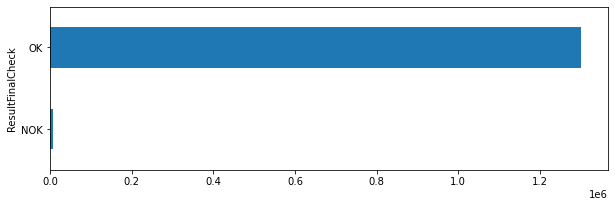

In [4]:
df_labels.groupby('ResultFinalCheck').size().plot(kind='barh', figsize=(10, 3))

In [4]:
#For demonstration purposes, restrict to one folder
df_labels = df_labels[df_labels.FilePath.str.contains("MPC2_IM_L1/S42_42/2019_02_08_11h")]

In [32]:
def plot_curve(df_curve, ax=None):
        
    if not ax:
        _, ax = plt.subplots()
    
    for feature in ['K7_1_TL','K7_2_TR','K7_3_BL','K7_4_BR','K3m_MC']:
        df_curve[feature].plot(ax=ax, label=feature)
    
    ax.legend(loc='lower right')
    ax.set_title(df_curve.name)

def parse_curve(filepath):
    """
    Parses the curve into a pandas dataframe
    
    WegSpd1 	mm 	Distance traveld by press
    KraftSpd1 	N 	Force spend by press
    K7_1_TL 	% 	Sharpness value top left
    K7_2_TR 	% 	sharpness value top right
    K7_3_BL 	% 	sharpness value bottom left
    K7_4_BR 	% 	sharpness value bottom right
    K7_5_MC 	% 	sharpness value middle center
    """
    df = pd.read_csv(
        filepath, 
        skiprows=33, 
        delimiter=';', 
        dtype=np.float,
        names=['WegSpd1','KraftSpd1','K7_1_TL','K7_2_TR','K7_3_BL','K7_4_BR','K3m_MC','K_7m)','MT'],
        usecols=range(9)
    )
    df.name = os.path.basename(filepath)
    num = df.isna().sum()
    #return df, sum(num)
    return df

In [17]:
df_curve, _ = parse_curve('/fs/scratch/ccserver_cc_cr_challenge/mpc2-inspection/MPC2_IM_L1/S42_42/2019_02_08_11h/5c5df082_20743_16123_IO.1')

In [27]:
df_curve, _ = parse_curve('/fs/scratch/ccserver_cc_cr_challenge/mpc2-inspection/MPC2_IM_L2/S42_42/2019_02_10_22h/5c6101b4_30952_40719_IO.1')

In [28]:
df_curve.head(100)

,WegSpd1,KraftSpd1,K7_1_TL,K7_2_TR,K7_3_BL,K7_4_BR,K3m_MC,K_7m),MT
0,0.00000,26.7,-0.018,-0.018,-0.018,-0.018,-0.031,0.000,2945.5
1,0.00000,26.7,-0.018,-0.018,-0.031,-0.006,-0.018,0.000,2945.5
2,0.00000,26.8,-0.018,-0.018,-0.031,-0.018,-0.018,0.000,2945.5
3,0.00000,26.7,-0.018,-0.018,-0.031,-0.018,-0.018,0.000,2945.5
4,0.00000,26.7,-0.018,-0.018,-0.018,-0.006,-0.006,0.000,2945.5
...,...,...,...,...,...,...,...,...,...
95,0.03860,29.9,-0.031,-0.018,-0.018,-0.018,0.031,-0.021,36.5
96,0.03922,30.1,-0.031,-0.018,-0.031,-0.018,0.031,-0.024,37.0
97,0.03967,29.9,-0.018,-0.018,-0.018,-0.018,0.031,-0.018,37.5
98,0.04028,29.8,-0.018,-0.018,-0.018,-0.018,0.043,-0.018,38.0


In [7]:
df_curve.shape

(2362, 9)

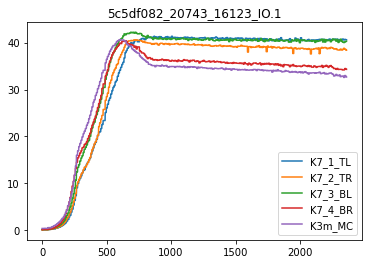

In [10]:
plot_curve(df_curve) #MT is to large at first

## look at data

In [72]:
def make_test_train_split(df_labels, random_state=12):
    idx_train, idx_test = train_test_split(df_labels.ResultFinalCheck, test_size=0.2, random_state=random_state)

    df_train = df_labels.loc[idx_train.index].reset_index(drop=True)
    df_test = df_labels.loc[idx_test.index].reset_index(drop=True)
    
    return df_train, df_test

In [11]:
df = pd.read_csv('/fs/scratch/ccserver_cc_cr_challenge/mpc2-inspection/train_labels.csv')
df_train, df_test = make_test_train_split(df)

In [9]:
not_ok = df_test[df_test.ResultFinalCheck == 'NOK']
ok = df_test[df_test.ResultFinalCheck == 'OK']
print(not_ok.shape, ok.shape)

(86, 2) (13014, 2)


In [13]:
df_test.to_csv('new_train_5_pec.csv', index=0)

## clean data

In [30]:
# filter df with feature lenth smaller than 1950 and na
dfs = pd.read_csv('new_train_5_pec.csv')
#print(dfs.shape)
df = df.dropna()
#print(dfs.shape)

curve_path='/fs/scratch/ccserver_cc_cr_challenge/mpc2-inspection/'
files = []
results = []
for i in range(len(dfs['FilePath'])):
    df, num = parse_curve(os.path.join(curve_path, dfs['FilePath'][i]))
    if i % 100 == 0:
        print('processed:%d'%i)
    if df.shape[0] >= 1950 and num == 0:
        files.append(dfs['FilePath'][i])
        results.append(dfs['ResultFinalCheck'][i])
    else:
        print(num)
        print(df.shape[0])

cont_list = {'FilePath':files, 'ResultFinalCheck':results}
df = pd.DataFrame(cont_list, columns=['FilePath','ResultFinalCheck'])
df.to_csv('clean_train_5_pec.csv', index=0)

processed:0
processed:100
processed:200
processed:300
0
1931
processed:400
processed:500
processed:600
0
1914
processed:700
0
1929
processed:800
processed:900
0
1949
processed:1000
processed:1100
processed:1200
processed:1300
processed:1400
processed:1500
processed:1600
processed:1700
processed:1800
processed:1900
processed:2000
processed:2100
processed:2200
0
1944
processed:2300
processed:2400
processed:2500
0
1929
processed:2600
processed:2700
0
1888
processed:2800
processed:2900
processed:3000
processed:3100
processed:3200
processed:3300
processed:3400
processed:3500
processed:3600
processed:3700
processed:3800
processed:3900
processed:4000
processed:4100
processed:4200
processed:4300
processed:4400
processed:4500
0
1923
processed:4600
processed:4700
0
1915
processed:4800
processed:4900
0
1905
processed:5000
0
1932
processed:5100
processed:5200
0
1881
processed:5300
0
1924
0
1927
processed:5400
0
1945
processed:5500
0
1930
processed:5600
processed:5700
processed:5800
processed:5900


processed:47500
processed:47600
processed:47700
processed:47800
processed:47900
processed:48000
processed:48100
0
1939
processed:48200
0
1902
processed:48300
processed:48400
processed:48500
processed:48600
processed:48700
0
1907
processed:48800
processed:48900
0
1946
processed:49000
processed:49100
processed:49200
processed:49300
processed:49400
0
1945
processed:49500
processed:49600
processed:49700
0
1919
processed:49800
processed:49900
processed:50000
processed:50100
processed:50200
0
1915
processed:50300
processed:50400
processed:50500
processed:50600
0
1937
processed:50700
processed:50800
processed:50900
0
1941
processed:51000
processed:51100
processed:51200
processed:51300
processed:51400
processed:51500
processed:51600
0
1943
processed:51700
processed:51800
processed:51900
0
1865
processed:52000
processed:52100
0
1916
processed:52200
0
1930
processed:52300
0
1908
processed:52400
processed:52500
processed:52600
0
1948
processed:52700
processed:52800
processed:52900
processed:53000

In [31]:
not_ok = df[df.ResultFinalCheck == 'NOK']
ok = df[df.ResultFinalCheck == 'OK']
print(not_ok.shape, ok.shape) # 0.0063

(415, 2) (64939, 2)


## compute mean and std

In [69]:
dfs = pd.read_csv('clean_train_5_pec.csv')
df_train, df_test = make_test_train_split(df)
dfs_len = len(df_test['FilePath'])
result_df = parse_curve(os.path.join(curve_path, df_test['FilePath'][0]))
i = 0
for filepath in df_test['FilePath'][1:dfs_len].values:
    if i % 100 == 0:
        print('processed:%d'%i)
    temp = parse_curve(os.path.join(curve_path, filepath))
    result_df = pd.concat([result_df,temp])
    i = i + 1

print(result_df.shape)

processed:0
processed:100
processed:200
processed:300
processed:400
processed:500
processed:600
processed:700
processed:800
processed:900
processed:1000
processed:1100
processed:1200
processed:1300
processed:1400
processed:1500
processed:1600
processed:1700
processed:1800
processed:1900
processed:2000
processed:2100
processed:2200
processed:2300
processed:2400
processed:2500
processed:2600
processed:2700
processed:2800
processed:2900
processed:3000
processed:3100
processed:3200
(7447084, 9)


In [66]:
print(result_df.mean()) # 1%

WegSpd1           0.164750
KraftSpd1        13.705410
K7_1_TL          30.770061
K7_2_TR          30.682821
K7_3_BL          30.777601
K7_4_BR          30.691695
K3m_MC           28.725416
K_7m)            12.397039
MT          -526479.375255
dtype: float64


In [70]:
print(result_df.mean()) # 5%

WegSpd1           0.163551
KraftSpd1        13.586131
K7_1_TL          30.917057
K7_2_TR          30.875045
K7_3_BL          30.826165
K7_4_BR          30.879995
K3m_MC           28.995421
K_7m)            12.470428
MT          -472945.497673
dtype: float64


In [67]:
print(result_df.std()) # 1%

WegSpd1      6.098782e-02
KraftSpd1    1.623548e+01
K7_1_TL      1.267807e+01
K7_2_TR      1.274468e+01
K7_3_BL      1.228380e+01
K7_4_BR      1.243596e+01
K3m_MC       1.051606e+01
K_7m)        1.630605e+01
MT           3.221270e+06
dtype: float64


In [71]:
print(result_df.std()) # 5%

WegSpd1      6.119196e-02
KraftSpd1    1.619622e+01
K7_1_TL      1.259245e+01
K7_2_TR      1.269009e+01
K7_3_BL      1.217232e+01
K7_4_BR      1.233527e+01
K3m_MC       1.052125e+01
K_7m)        1.634376e+01
MT           2.957244e+06
dtype: float64


## filter anomaly

In [73]:
dfs = pd.read_csv('clean_train_5_pec.csv')
df_train, df_test = make_test_train_split(df)

In [74]:
df_clean = df_train[df_train['ResultFinalCheck'] == 'OK']

In [75]:
df_train.to_csv('clean_train_5_pec_70_pec.csv', index=0)

In [76]:
df_test.to_csv('clean_test_5_pec_30_pec.csv', index=0)

In [78]:
df_clean.to_csv('pure_train_5_pec_70_pec.csv', index=0)

In [79]:
df_test.shape, df_clean.shape, df_train.shape

((13071, 2), (51973, 2), (52283, 2))